# Week 3 HW : Time Series Analysis

1. Kratika Aggarwal 
2. Submission: 10/02/2022 by 6pm.

### 2. Import the main libraries (numpy, pandas, seaborn, matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 1. Loading the multiTimeline.csv data.

In [2]:
data = pd.read_csv('/Users/kratikaaggarwal/Desktop/UMBC/DATA 602/Week3/multiTimeline.csv')

### 3. - Check the information about the data.

In [3]:
data.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
data.tail()

,Month,Diet,Gym,Finance
163,2017-08,46,52,43
164,2017-09,44,50,47
165,2017-10,44,47,45
166,2017-11,41,47,47
167,2017-12,39,45,56


The data is spanning across 14 years ie. 168 months.

In [5]:
data.shape

(168, 4)

In [6]:
data.describe()

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


### Exploratory Data Analysis 

In [7]:
data.isnull().sum()

Month      0
Diet       0
Gym        0
Finance    0
dtype: int64

In [8]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
90%,58.300000,47.000000,54.000000
95%,64.000000,50.650000,57.000000
99%,72.990000,53.990000,60.330000


### Checking for Outliers

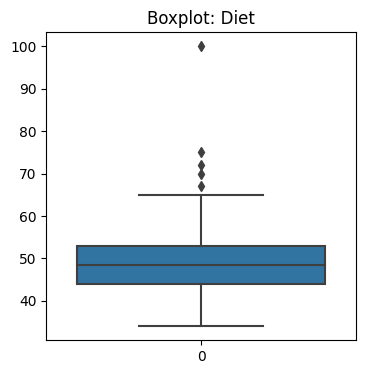

In [25]:
plt.figure(figsize=(4,4))
sns.boxplot(data['Diet'])
plt.title('Boxplot: Diet')
plt.show()

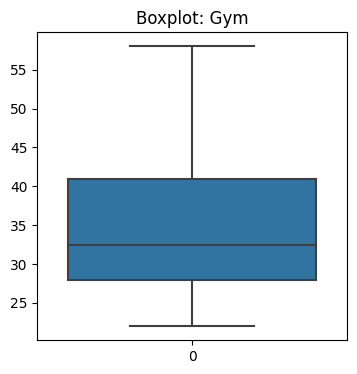

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(data['Gym'])
plt.title('Boxplot: Gym')
plt.show()

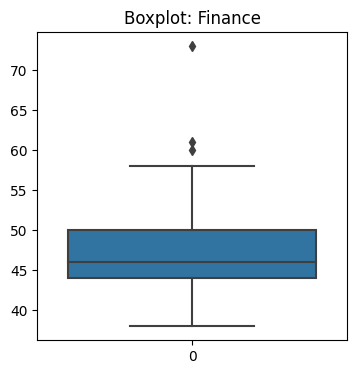

In [27]:
plt.figure(figsize=(4,4))
sns.boxplot(data['Finance'])
plt.title('Boxplot: Finance')
plt.show()

Finance & Diet do have outliers, but I will keep them for further analysis.

### Converting Month to Correct Format(datetime) - Setting Index to 'Month'

In [12]:
data.set_index(pd.to_datetime(data['Month']), inplace = True)
data=data.drop(['Month'], axis=1)
data.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## Visualizing the data

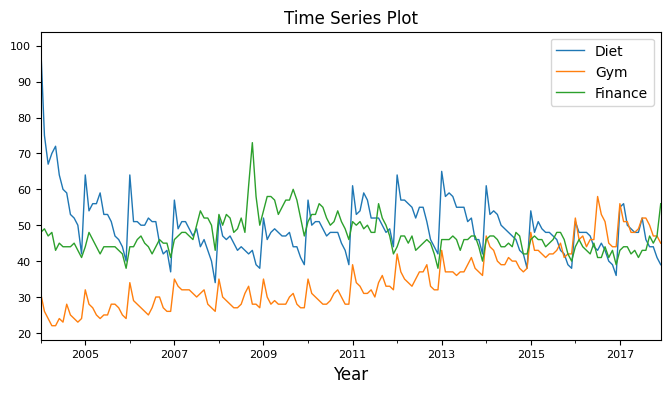

In [13]:
data.plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('Time Series Plot');

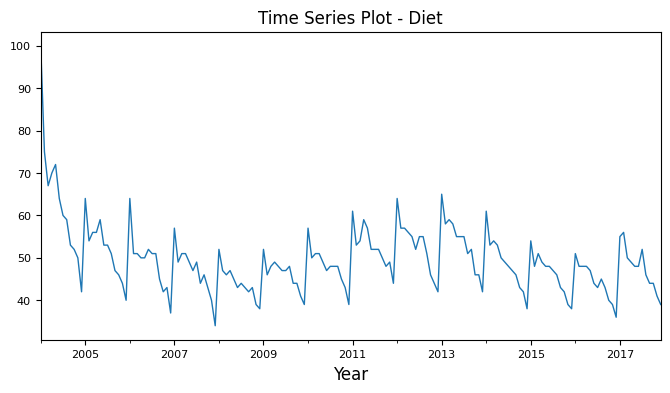

In [14]:
data['Diet'].plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('Time Series Plot - Diet');

### Visualizing Trend in Data : Rolling Means 

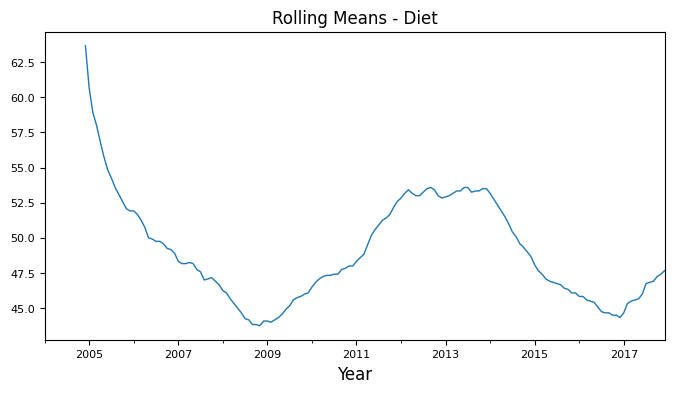

In [15]:
diet = data['Diet']
diet.rolling(12).mean().plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('Rolling Means - Diet');

Trend is the smooth long term tendency of a time series . It might change direction (increase or decrease) as time progresses. In this case, it is decreasing with a high in 2012-2014.

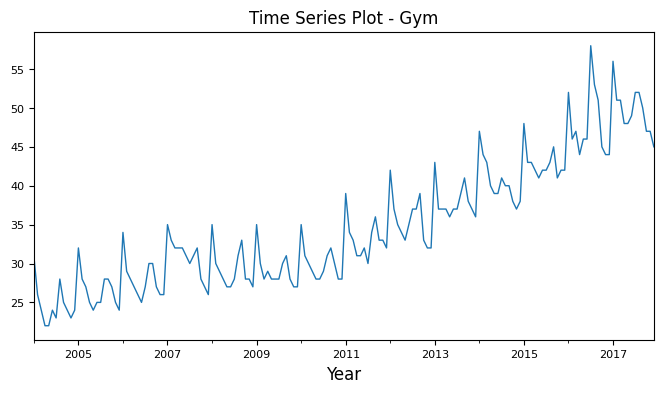

In [16]:
data['Gym'].plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('Time Series Plot - Gym');

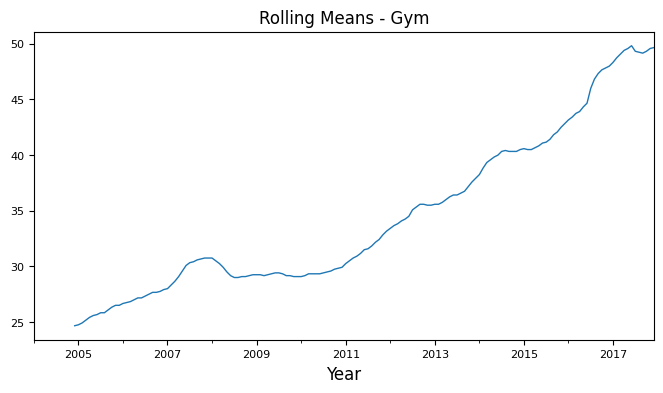

In [17]:
gym = data['Gym']
gym.rolling(12).mean().plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('Rolling Means - Gym');

Trend is the smooth long term tendency of a time series . It might change direction (increase or decrease) as time progresses. In this case, it is increasing.

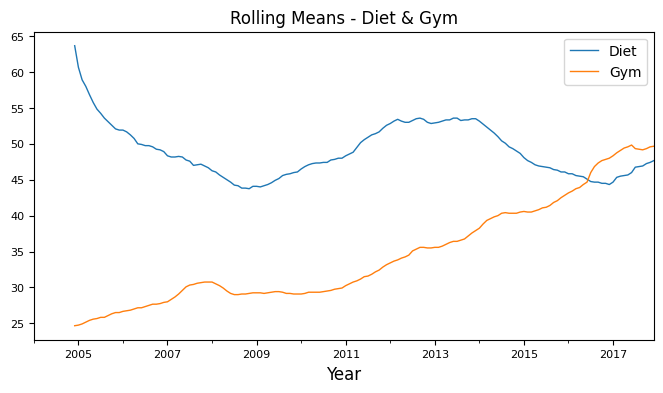

In [18]:
data_rolling_avg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
data_rolling_avg.plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('Rolling Means - Diet & Gym');

In [19]:
data.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


### Removing Trend from Time Series : Differencing

It essentially means creating a new time series wherein value at time (t)= original value at time (t) - original value at time (t-1).
Helpful in turning the time series into a stationary time series.

#### Creating First Order Differencing Data

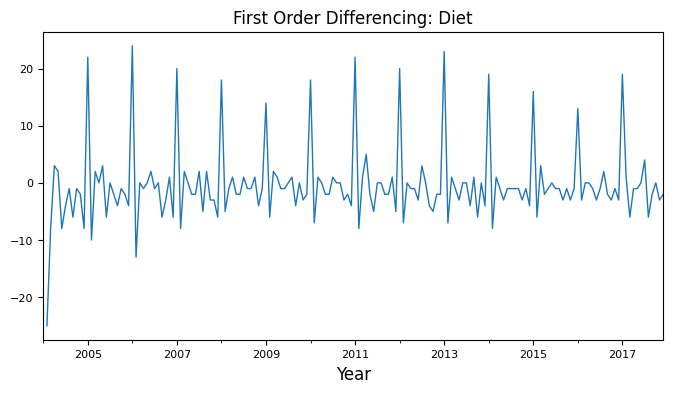

In [20]:
diet_diff=diet.diff()
diet_diff.plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12);
plt.title('First Order Differencing: Diet');

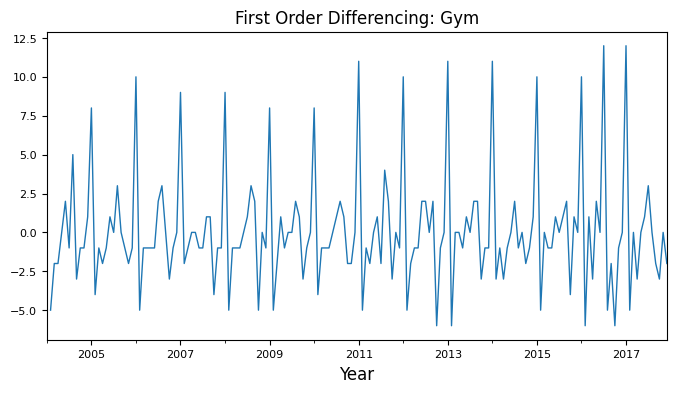

In [21]:
gym_diff=gym.diff()
gym_diff.plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12);
plt.title('First Order Differencing: Gym');

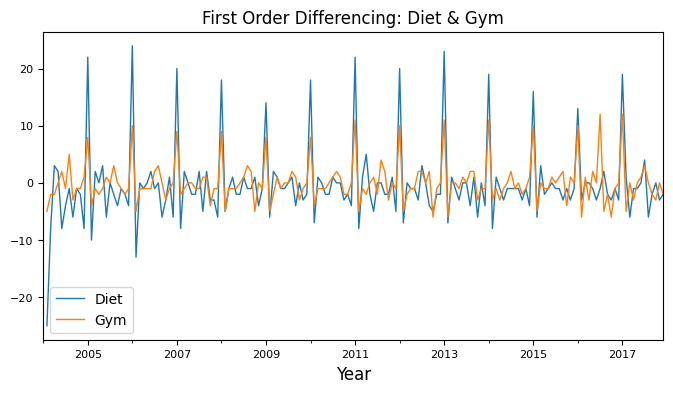

In [22]:
data_diff = pd.concat([diet_diff, gym_diff], axis=1)
data_diff.plot(figsize=(8,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=12)
plt.title('First Order Differencing: Diet & Gym');

As shown, Diet and Gym have a high correlation once the trends are removed. This can be confirmed with the correlation matrix below.

In [23]:
data_diff.corr()

,Diet,Gym
Diet,1.000000,0.758707
Gym,0.758707,1.000000


### Autocorrelation

Autocorrelation is a technique for analyzing seasonality(also called periodic;a time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months, every 1 week, every 4 months, and so on.). It plots the correlation of the time series with itself at a different time lag.

A more intuitive way would be, if you take a time series and move it by 12 months (lag = 12) backwards or forwards, it would map onto itself in some way. Autocorrelation is a way of telling how good this mapping is. If it is very good, it means the time series and the shifted time series are almost similar and the correlation at that time lag would be high.

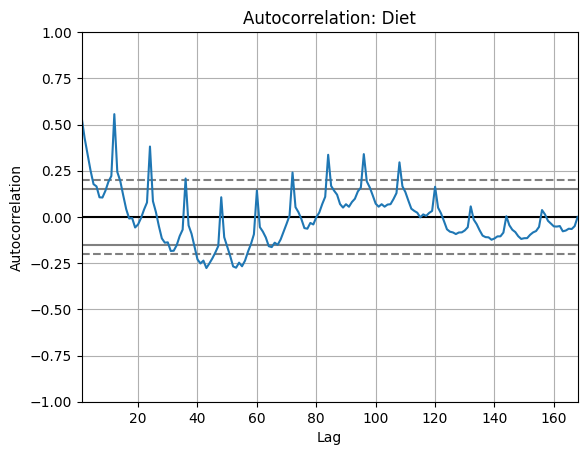

In [24]:
x = pd.plotting.autocorrelation_plot(data['Diet'])
plt.title('Autocorrelation: Diet');
x.plot()
plt.show()

The x axis has the lag, and the y axis shows how correlated the time series is with itself at the lag. Looking at the graph above we can see that the time series repeats itself every 12 months or every year. As we move further away, the correlation decreases. 

The dotted line in the above graph tells the statistical significance of the correlation. Each spike that falls above or below the dotted line is considered to be statistically significant. The more the values differ from zero, the more likely some correlation exists. There is seasonality in the chart, as there is an evident sine wave. This shows that a value strongly correlates with another data point in the future. Hence in this case, we can conclude that there is indeed autocorrelation with a lag of 12 months(5 spikes in every 60 months).

### References: 

1. https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8
2. https://www.mikulskibartosz.name/finding-seasonality-in-time-series-using-autocorrelation-plot/